In [1]:
import pandas as pd
churn_data = pd.read_csv('/Users/nikolai/Documents/DataScience/VSCode/block1_Python13_DataVisualization/churn.csv')
my_churn_data = churn_data.copy()
my_churn_data = my_churn_data.drop(['RowNumber'], axis=1)
my_churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.


Распределение всех клиентов
 Лояльные: 7963 79.6%
 Ушедшие 2037 20.4%


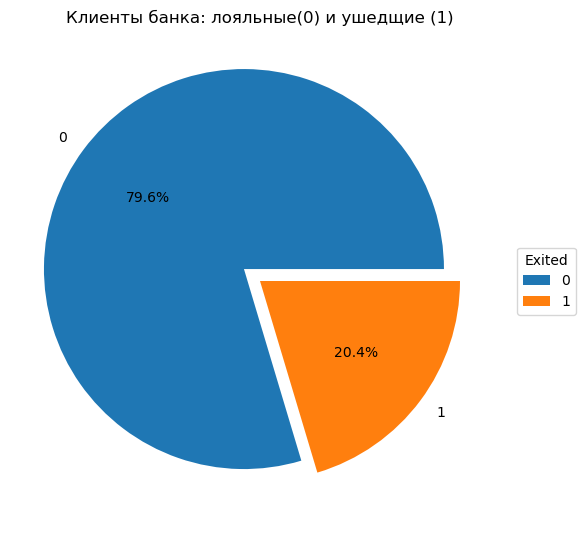

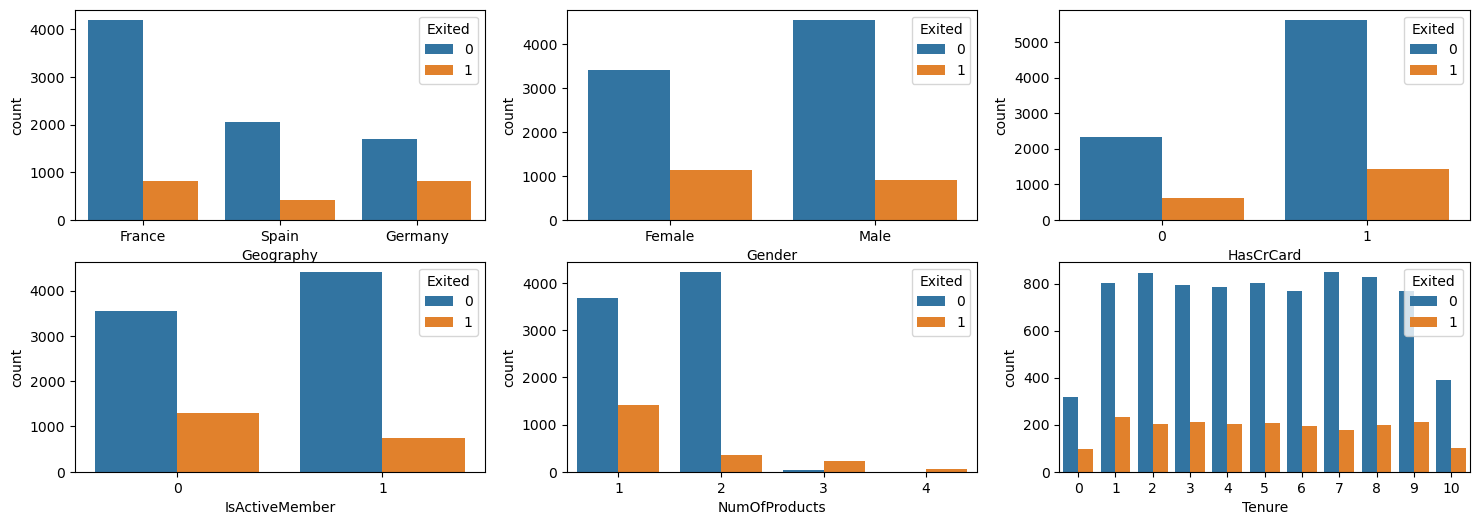

In [2]:
import matplotlib.pyplot as plt

"""
Функция стоит графики зависимости между категориальными признаким и 
вычисляет соотношение между лояльными и ушедшими клиентами в DataFrame
Arg: 
    df - DataFrame с данными 
    my_tytle - строка заголовка

"""
def show_dependent_variable(df, my_var, my_title):
    import seaborn as sns

    fig, axarr = plt.subplots(2, 3, figsize=(18, 6))
    sns.countplot(x = 'Geography', hue = my_var,data = df, ax = axarr[0][0])
    sns.countplot(x = 'Gender', hue = my_var,data = df, ax = axarr[0][1])
    sns.countplot(x = 'HasCrCard', hue = my_var,data = df, ax = axarr[0][2])
    sns.countplot(x = 'IsActiveMember', hue = my_var,data = df, ax = axarr[1][0])
    sns.countplot(x = 'NumOfProducts', hue = my_var,data = df, ax = axarr[1][1])
    sns.countplot(x = 'Tenure', hue = my_var,data = df, ax = axarr[1][2])
       
    zero, one = df[my_var].value_counts() 
    print(my_title)
    print(" Лояльные:", zero , "%.1f%%" % (100 * zero/(zero+one)))
    print(" Ушедшие", one, "%.1f%%" % (100 * one/(zero+one)))


client_combinations = my_churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])


axes.pie(
    client_combinations,
    labels=client_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0]
);
axes.set_title("Клиенты банка: лояльные(0) и ушедщие (1)")
axes.legend(
    title="Exited",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

titel_allclnt = "\nРаспределение всех клиентов"
dependent_variable_name = "Exited"    
show_dependent_variable(my_churn_data,dependent_variable_name,titel_allclnt)
 

Комментарий:
 - Примерно каждый пятый клиент имеет статус лояльности - "Ушедший"

 - Чуть больше уходят женщины (1139), чем мужчины (898). Лояльны же более мужчины (4559), женщины - (3404)
 - Большинство ушедших имело кредитную карту (1424), не имело карту (613). Среди лояльных ОПРЕДЕЛЯЮЩЕЕ большинство имеет кредитную карту (5631), лояльные у которых нет карты (2332)
 - Большинство ушедших не имело активного статуса (1302), имели статус среди ушедших (735). Среди лояльных имеет активный статус (4416), не имеет статуса - (3547).
 - Большинство из ушедших имело 1 продукт банка (1409), 2 - 348, 3 - 220, 4 - 60. Среди лояльных большинство имееет 2 - 4242, 1 - 3675, 3 - 46, 4 - 0!
 - Соотношение ушедший/лояльный примерно в течении первого года в банке - 1/3, после первого года  - 1/4. Соотношение примерно одинаковое от года к году, и практически не изменяется и не зависит от того, сколько лет клиент пользуется услугами банка. Можно также отметить, что к 10му году количество лояльных/ушедших клиентов в 2 раза меньше, чем годом ранее.


9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.


Распределение всех клиентов
 Лояльные: 7963 79.6%
 Ушедшие 2037 20.4%

Счета клиентов с балансом более 2500
 Лояльные: 4846 75.9%
 Ушедшие 1537 24.1%


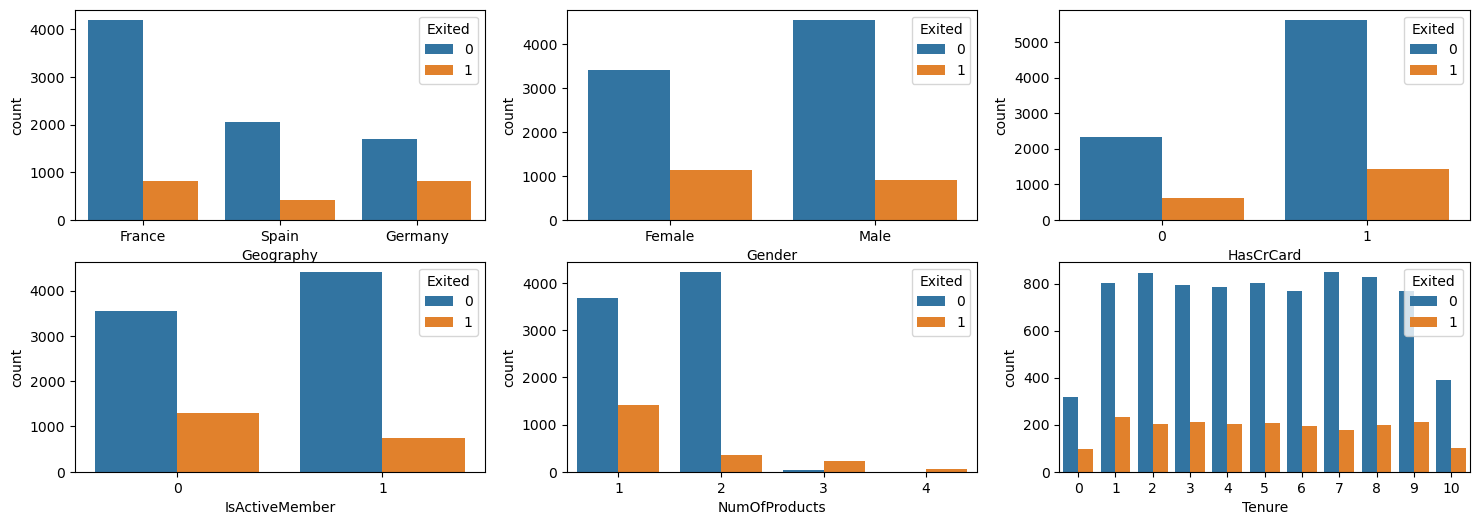

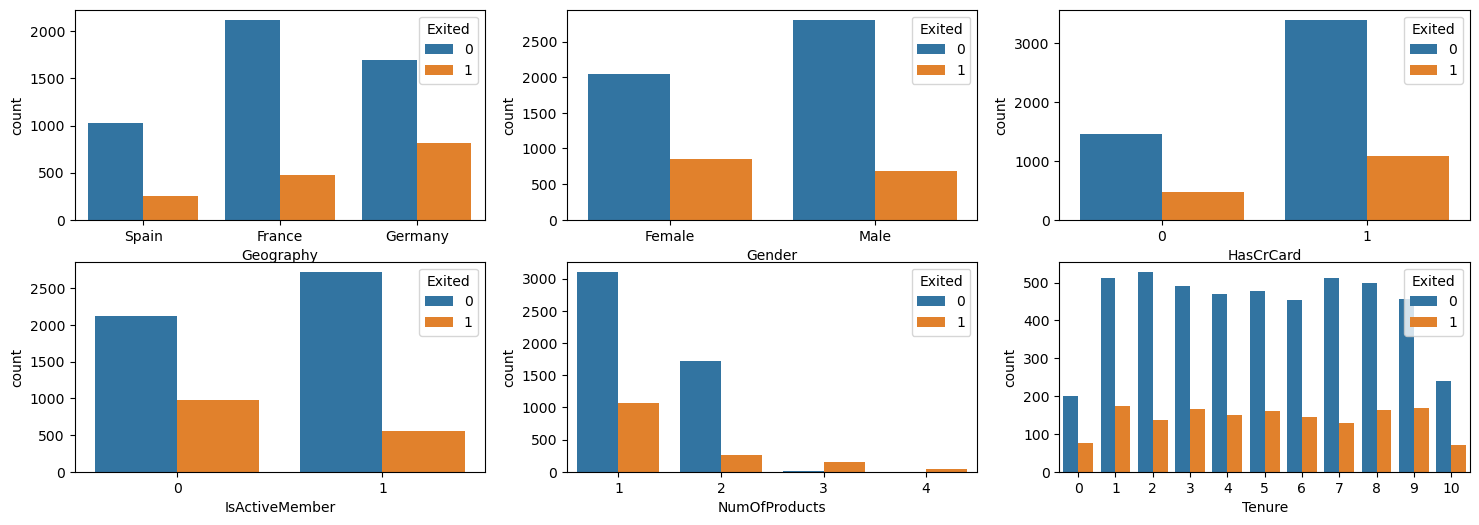

In [5]:
client_2500 = my_churn_data[churn_data['Balance'] >= 2500]

title_2500 = "\nСчета клиентов с балансом более 2500"
title_2500less = "\nСчета клиентов от 0 до 2500"
show_dependent_variable(my_churn_data,dependent_variable_name,titel_allclnt)
show_dependent_variable(client_2500,dependent_variable_name,  title_2500)

#client_2500['Exited'].value_counts()

Комментарии:
 - 63% от общего количества счетов - это счета с балансом от 2500. -> Большая часть счетов в банке от 2500
 - Среди лояльных и ушедщих: 61% (от всех лояльных) - лояльные c балансом от 2500; 75%(от всех ушедших) - ушедшие с балансом от 2500 -> Уходят в основном клиенты с балансом от 2500
 - 1/3 это счета ушедших клиентов. 
 - Чуть меньше половины счетов лояльных клиентов находится во Франции, пятая часть в Испании и треть в Германии. -> Лояльных с балансом от 2500 больше во Франции
 
 - Среди ушедших больше половины счетов - это Германия, треть - Франция, меньше 20% - Испания. -> Большая часть ушедших с балансом 2500 из Германии
 - Примерно 42% владельцы лояльных счетов женщины, 58% - мужчины. -> Большая часть лояльных с балансом от 2500 - это мужчины
 - Среди ушедших, c балансом от 2500, чуть больше половины - это женшины.
 - 72% лояльных клиентов c балансом от 2500 имеют кредитную карту. 
 - 70% ушедших с балансом от 2500 имели кредитную карту.
 - 57% лояльных клиентов имеют активный статус. -> Большая часть лояльных с балансом 2500 имеют активный статус, 43% не имеют.
 - 70% ушедших - не имели активного статуса -> Большая часть ушедших с счетом 2500 не имели активного статуса
 - 64% лояльных клиентов с балансом 2500 имеют один продукт, 35% - 2, менее 1% - 3. 
 - 70% ушедших имели 1 продукт, примерно 16% - 2, менее 10% - 3 и 4 продукта. -> Большая часть ушедших имело 1 продукт в банке
 - Соотношение ушедший/лояльный примерно в течении первого года в банке - 1/3, после  - 1/4. Соотношение одинаковое от года к году, и практически не изменяется от того сколько лет клиент пользуется услугами банка. Можно отвемить что к 10му году количество лояльных клиентов в 2 раза меньше, чем годом ранее.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Медиана счетов ушедших: 109349
Средняя счетов ушедших: 91109
Максимальный счет ушедших: 250898
Медиана счетов лояльных: 92073
Средняя счетов лояльных: 72745
Максимальный счет лояльных: 221533

Соотношение клиентов с нулевым балансом
 Лояльные: 3117 86.2%
 Ушедшие 500 13.8%


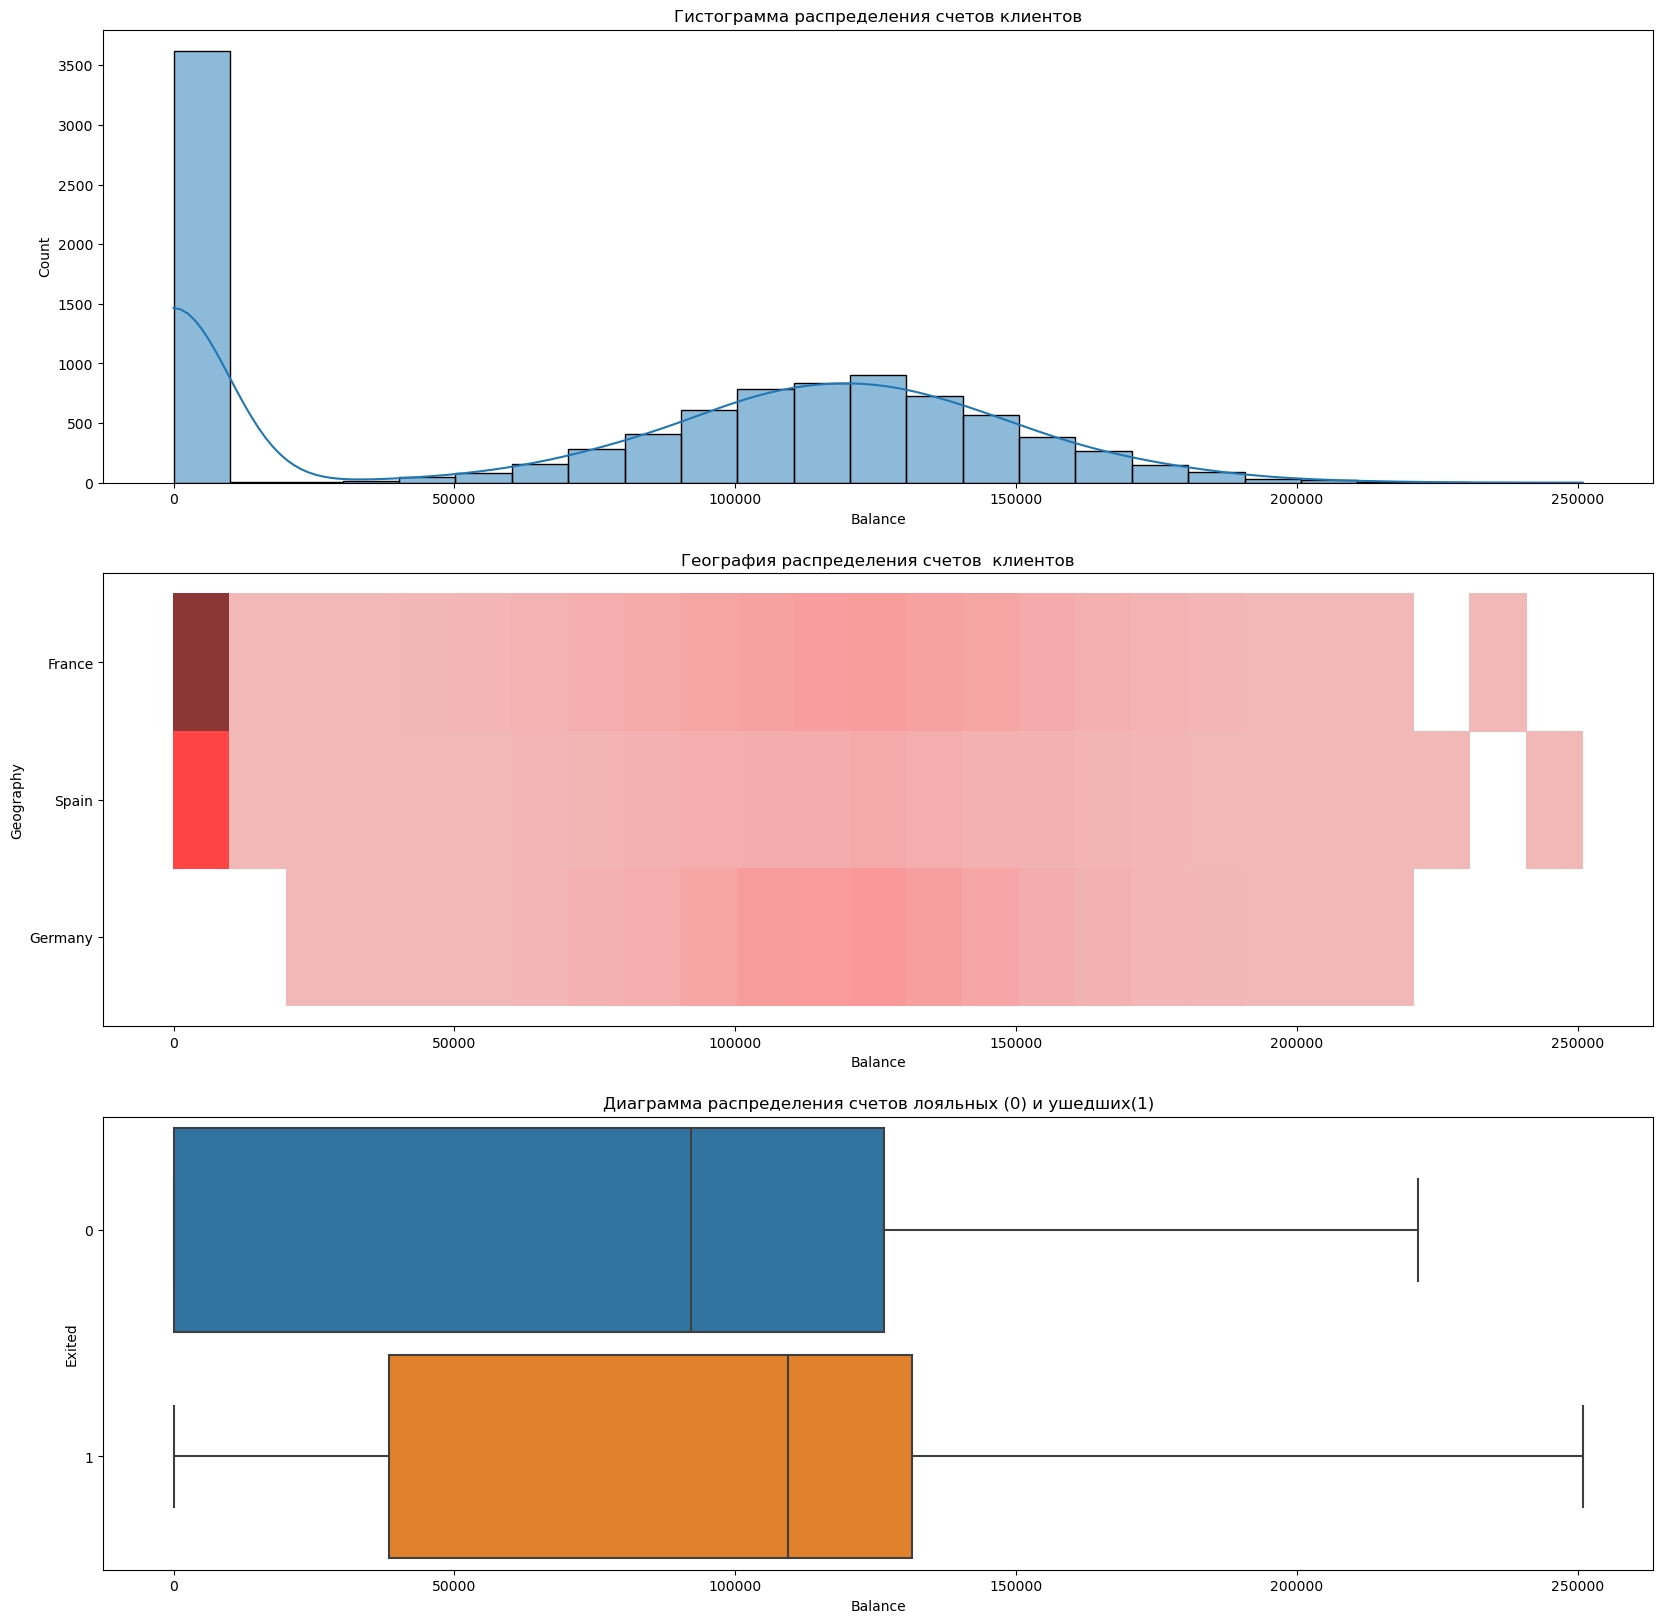

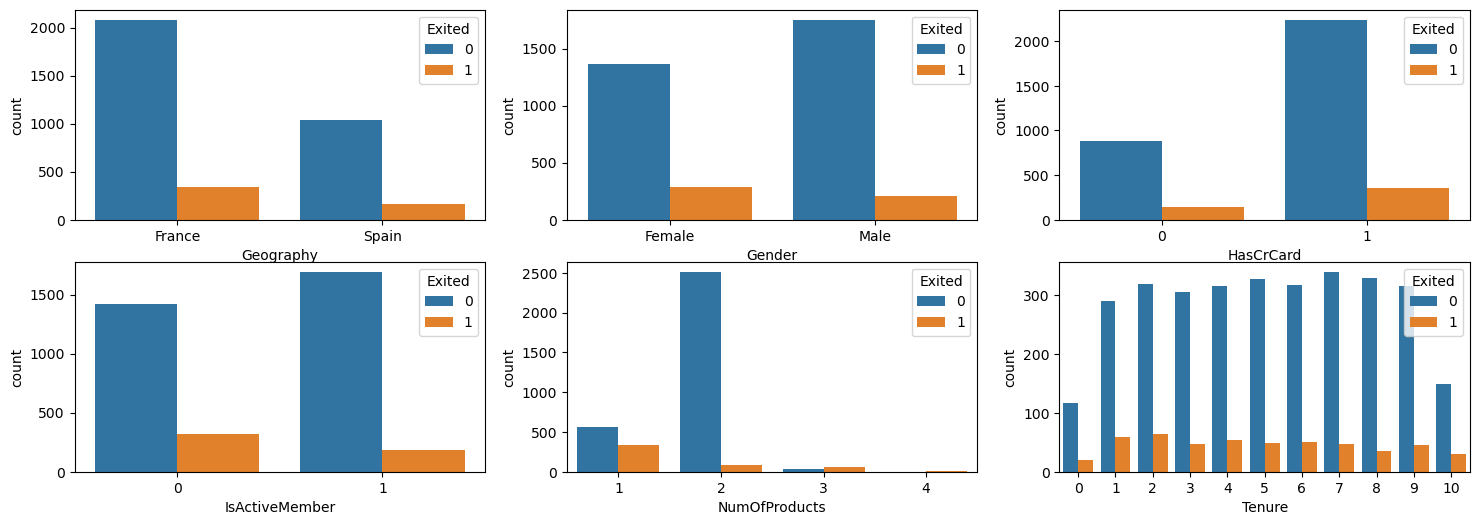

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
axes[0].set_title('Гистограмма распределения счетов клиентов', fontsize=12)
axes[1].set_title('География распределения счетов  клиентов', fontsize=12)
axes[2].set_title('Диаграмма распределения счетов лояльных (0) и ушедших(1)', fontsize=12)
sns.histplot(
    data=my_churn_data,
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0]
);

sns.histplot(
    data=my_churn_data,
    x='Balance',
    y='Geography',
    bins=25,
    color='red',
    ax=axes[1]
);

sns.boxplot(
    data=my_churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9,
    ax=axes[2]

);

median_balance_ex = my_churn_data[my_churn_data['Exited'] == 1]['Balance'].median()
mean_balance_ex = my_churn_data[my_churn_data['Exited'] == 1]['Balance'].mean()
max_balance_ex = my_churn_data[my_churn_data['Exited'] == 1]['Balance'].max()
print("Медиана счетов ушедших:", round(median_balance_ex))
print("Средняя счетов ушедших:", round(mean_balance_ex))
print("Максимальный счет ушедших:", round(max_balance_ex))

median_balance_lo = my_churn_data[my_churn_data['Exited'] == 0]['Balance'].median()
mean_balance_lo = my_churn_data[my_churn_data['Exited'] == 0]['Balance'].mean()
max_balance_lo = my_churn_data[my_churn_data['Exited'] == 0]['Balance'].max()
print("Медиана счетов лояльных:", round(median_balance_lo))
print("Средняя счетов лояльных:", round(mean_balance_lo))
print("Максимальный счет лояльных:", round(max_balance_lo))
null_balance = my_churn_data[my_churn_data['Balance'] == 0]

title_nullbal = "\nСоотношение клиентов с нулевым балансом"
show_dependent_variable(null_balance, dependent_variable_name, title_nullbal)


Комментарии 9.3:
- Мы видим, что примерно 45% всех счетов клиентов имеют нулевой баланс. 
 - 2/3 клиентов с нулевым балансом во Франции, 1/3 - в Испании. В Германии нет счетов с нулевым балансом.
 
 - Медиана счетов ушедших: 109349
 - Средняя счетов ушедших: 91109
 - Максимальный счет ушедших: 250898
 
 - Медиана счетов лояльных: 92073
 - Средняя счетов лояльных: 72745
 - Максимальный счет лояльных: 221533

- 60% лояльных нулевых счетов мужские. 55% среду ушедших с нулевым счетом  - женщины.
- 70% лояльных и ушедших c нулевым счетом имеют кредитную карту. 
- 55% лояльных с нулевым балансом имеют статус активного члена. более 60% ушедших с нулевым балансом не имеют активного статуса.
- более 80% лояльных клиентов с нулевым балансом имеют 2 продукта банка, менее 18% - 1, менее 2% - 3.
- в год порядка 300 лояльных клиентов которые пользуется услугами банка от 1 до 9 лет имеют нулевой баланс.

Чтобы определить с чем может быть связан отток клиентов, проведём на данном этапе ABC-анализ для выявления основных категорий признаков:
Группа А - 60-80%
Группа B - в сумме не более 40%
Группа С - наименее значимые, менее 20% (если есть такие)

Определим исходя из признаков Группы для ушедших клиентов:
Группа А ушедших:
 - Баланс счёта от 2500 (75% от всех ушедших)
 
 Смотрим на счета с балансом от 2500:
 - Большая часть ушедших с балансом 2500 из Германии (более 50%) и Франции (25%)
 - Среди ушедших, c балансом от 2500, чуть больше половины - это женшины.
 - 70% ушедших с балансом от 2500 имели кредитную карту.
 - 70% ушедших - не имели активного статуса
 - 70% ушедших имели 1 продукт в банке

Группа B ушедших:
 - Баланс счёта нулевой (25% от всех ушедших) 

 Смотрим на счета с нулевым балансом:
 - 2/3 клиентов с нулевым балансом во Франции, 1/3 - в Испании
 - 55% ушедших с нулевым счетом - женщины.
 - 70% ушедших c нулевым счетом имели кредитную карту. 
 - более 60% ушедших с нулевым балансом не имеют активного статуса.
 - более 60% ушедших клиентов с нулевым балансом имели только 1 продукт банка

Группа А лояльные:
 - Баланс счёта от 2500 (61% от всех лояльных)

 Смотрим на счета с балансом от 2500:
 - Лояльных с балансом от 2500 больше во Франции (44%) и Германии (35%)
 - Большая часть лояльных с балансом от 2500 - это мужчины (58%)
 - 72% лояльных клиентов c балансом от 2500 имеют кредитную карту.
 - Большая часть лояльных с балансом 2500 имеют активный статус (57%)
 - 64% лояльных клиентов с балансом 2500 имеют один продукт, 35% - 2

 Группа B лояльные:
  - Баланс счёта нулевой (39%)

 Cмотрим на счета с нулевым балансом:
  - 2/3 клиентов с нулевым балансом во Франции, 1/3 - в Испании
  - 60% лояльных нулевых счетов мужские.
  - 70% лояльных c нулевым счетом имеют кредитную карту.
  - 55% лояльных с нулевым балансом имеют статус активного члена.
  - более 80% лояльных клиентов с нулевым балансом имеют 2 продукта банка, менее 18% - 1

Соотвественно устранение причин группы А имеет большой приоритет, а связанные с этим мероприятия - самую высокую эффективность.
К примеру, для группы А ушедшие высокую эффективность будут иметь следующие стратегии:
1. Для лояльных клиентов с балансом счёта от 2500, мужчинам из Германии и Франции, вне зависимости от того есть ли у них кредитная карта или нет, у тех у кого есть активный статус, предложить более одного банковского продукта.
2. Для лояльных клиентов с балансом счёта от 2500, мужчинам из Германии и Франции, вне зависимости от того есть ли у них кредитная карта или нет, у тех у кого нет активного статус, предложить более одного банковского продукта.
3. Для лояльных клиентов с балансом счёта от 2500, мужчинам из Германии и Франции, вне зависимости от того есть ли у них кредитная карта или нет, у тех у кого нет активного статус, предложить активный статус и более одного банковского продукта.
и т.д. 
 
 

 

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

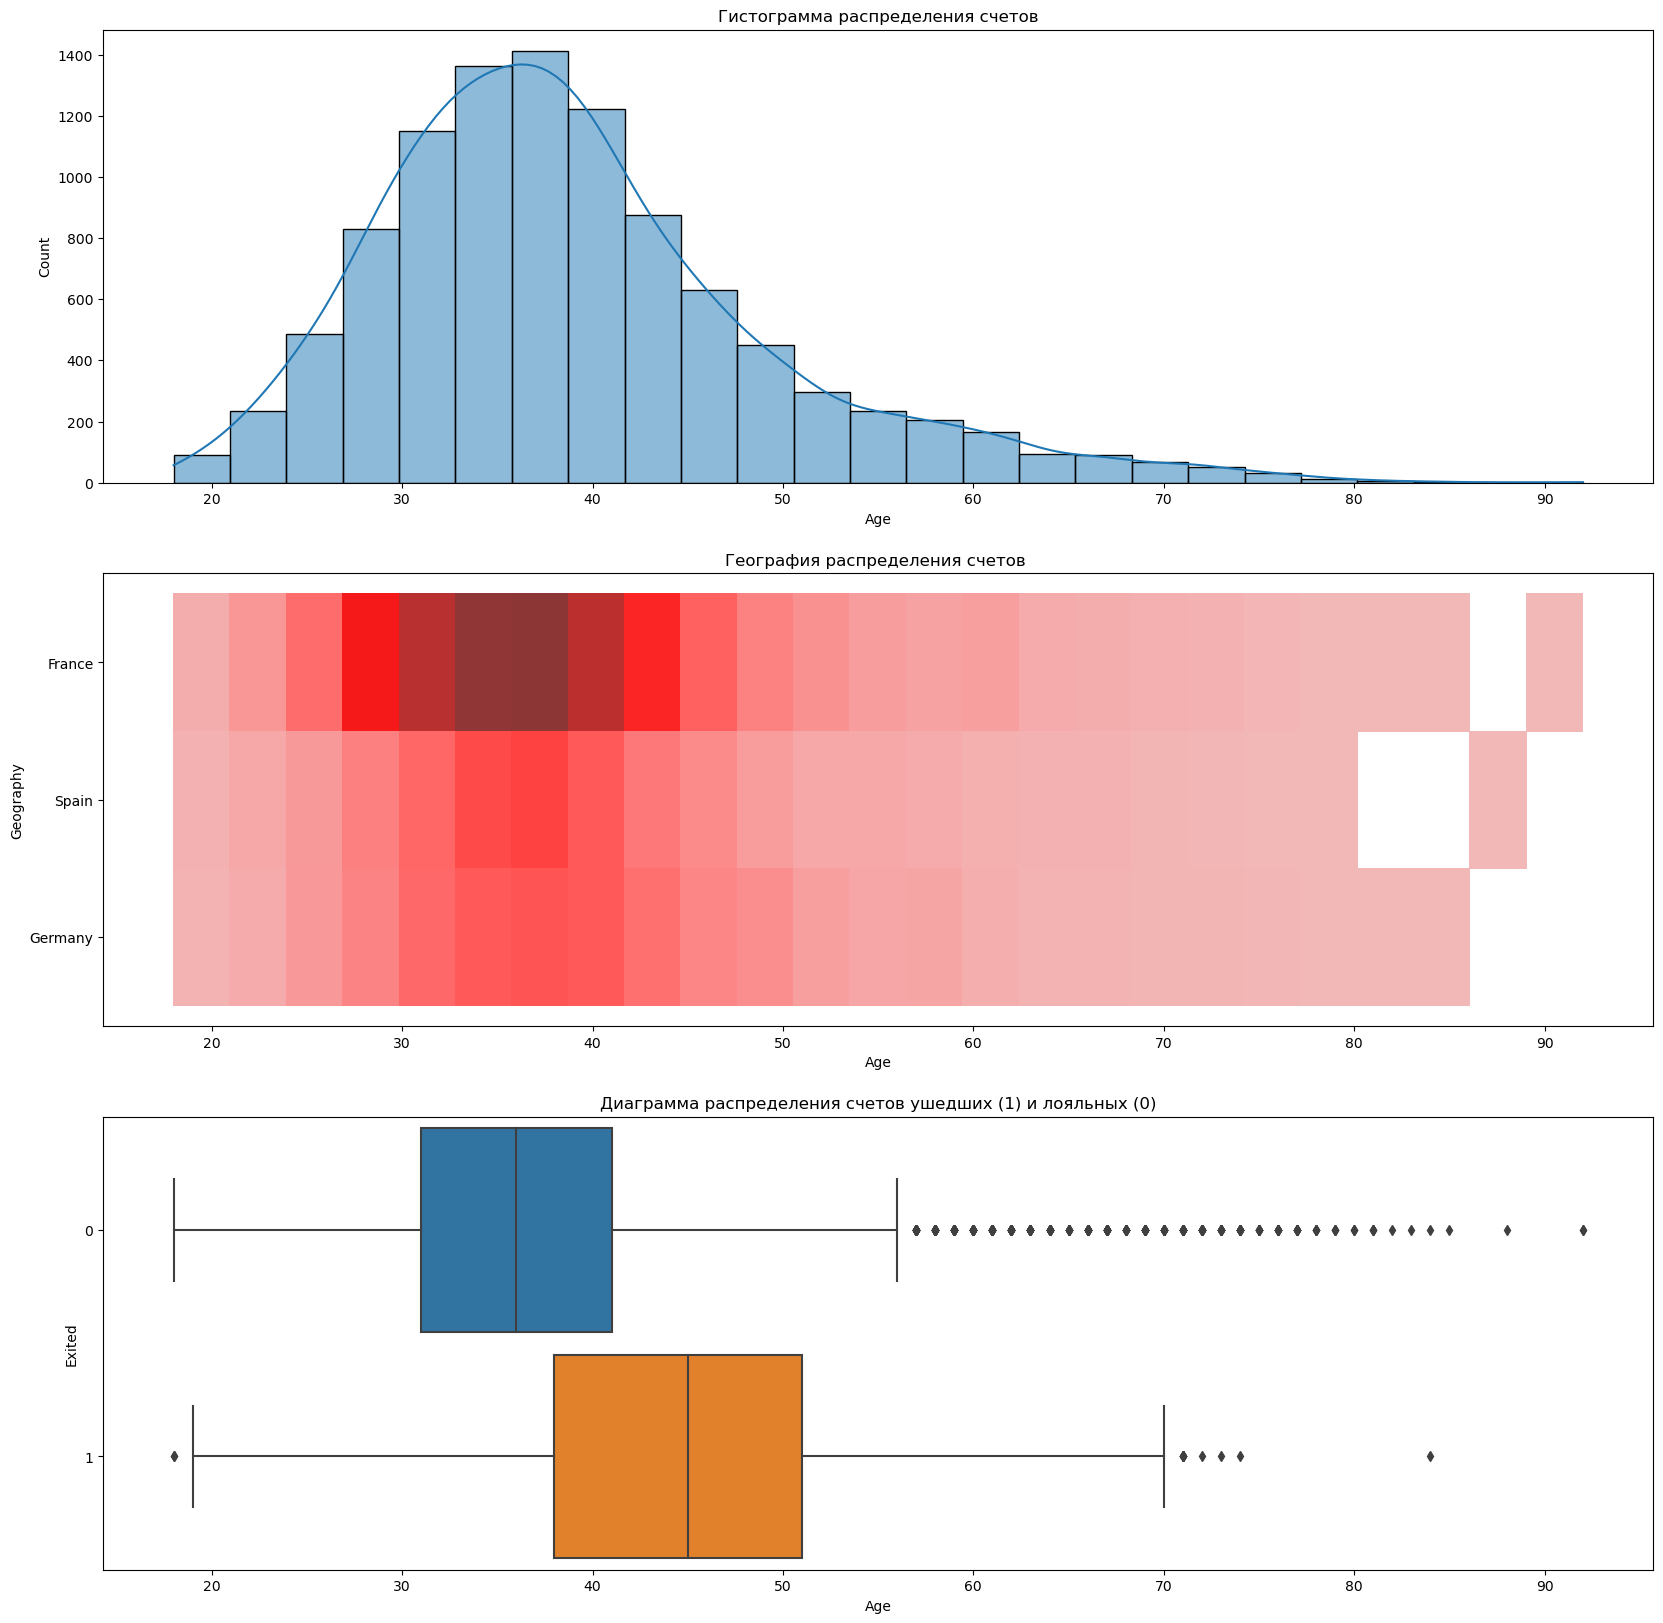

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
axes[0].set_title('Гистограмма распределения счетов', fontsize=12)
axes[1].set_title('География распределения счетов ', fontsize=12)
axes[2].set_title('Диаграмма распределения счетов ушедших (1) и лояльных (0)', fontsize=12)
sns.histplot(
    data=churn_data,
    x='Age',
    bins=25,
    kde=True,
    ax=axes[0]
);

sns.histplot(
    data=churn_data,
    x='Age',
    y='Geography',
    bins=25,
    color='red',
    ax=axes[1]
);

sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
    ax=axes[2]

);

Комментарий 9.4:
- Основная группа лояльных клиетов в возрасте от 31 до 41
- Основная группа ушедших клиентов от 38 до 51
- Больше всего потенциальных выбросов в группе лояльных клиентов
- Банку стоит обратить внимание на клиентов с возрастом от 38 до 41, так как в этой категори есть пересечения с возрастными категориям ушедших.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0.5, 0.98, 'Взаимосвязь рейтинга и зарплаты (только ушедшие)')

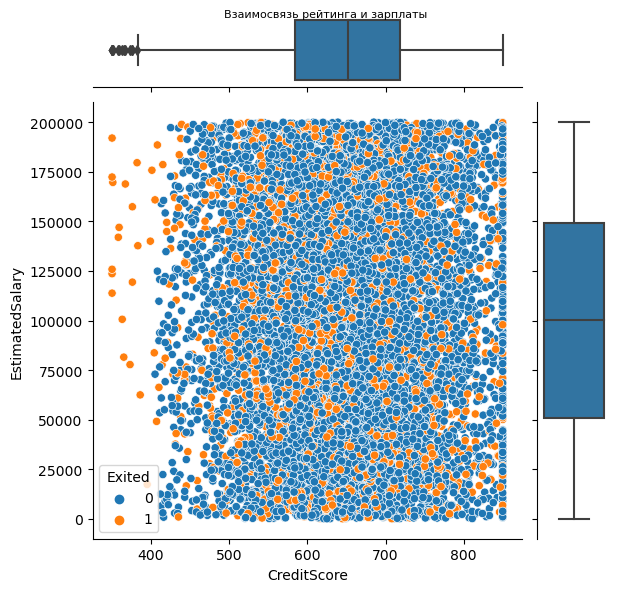

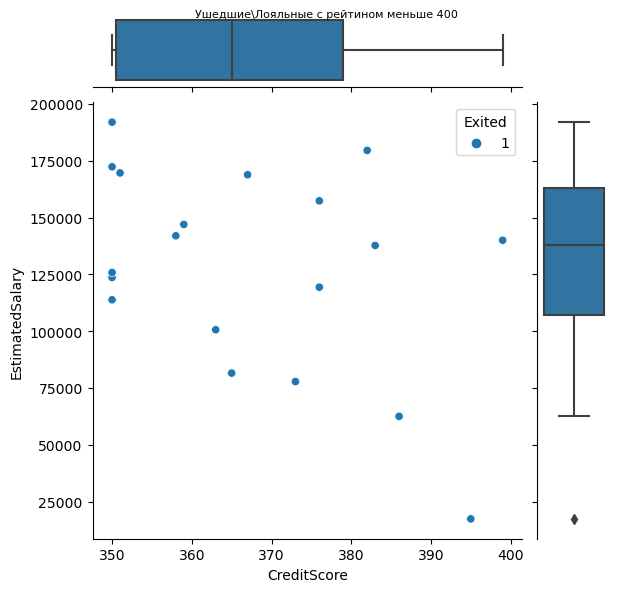

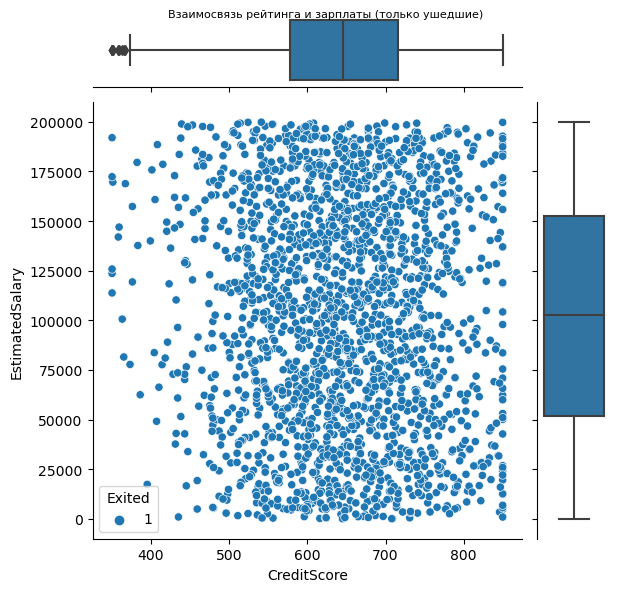

In [203]:
g = sns.JointGrid(data=my_churn_data, x="CreditScore", y="EstimatedSalary", hue="Exited")
g.plot(sns.scatterplot, sns.boxplot)
g.fig.suptitle('Взаимосвязь рейтинга и зарплаты', fontsize=8)

gs = sns.JointGrid(data=my_churn_data[my_churn_data['CreditScore'] < 400], x="CreditScore", y="EstimatedSalary", hue="Exited")
gs.plot(sns.scatterplot, sns.boxplot)
gs.fig.suptitle('Ушедшие\Лояльные с рейтином меньше 400', fontsize=8)

gg = sns.JointGrid(data=churn_data[churn_data['Exited'] == 1], x="CreditScore", y="EstimatedSalary", hue="Exited")
gg.plot(sns.scatterplot, sns.boxplot)
gg.fig.suptitle('Взаимосвязь рейтинга и зарплаты (только ушедшие)', fontsize=8)

Комментарий 9.5:
 - Кредитый рейтиг основной части клиентов находится между 580 и 710
 - Ориентировачная зарплата основной части клиентов между 50к и 150к
 - Прослеживается чёткая взаимосвязь, что рейтинг лояльных клиентов не опускается ниже 400.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

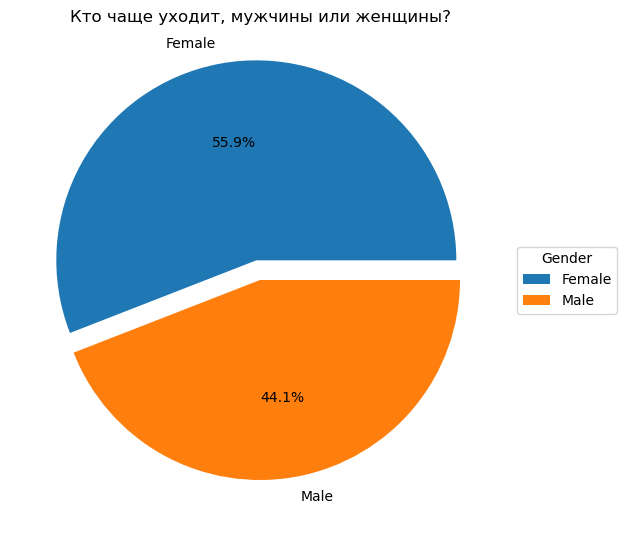

In [15]:
gender_ex = my_churn_data[my_churn_data['Exited']==1]['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])


axes.pie(
    gender_ex,
    labels=gender_ex.index,
    autopct='%.1f%%',
    explode = [0.1, 0]
);
axes.set_title("Кто чаще уходит, мужчины или женщины?")
axes.legend(
    title="Gender",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

Комментарий 9.6:
 - Чаще уходят женщины (55,9%)

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

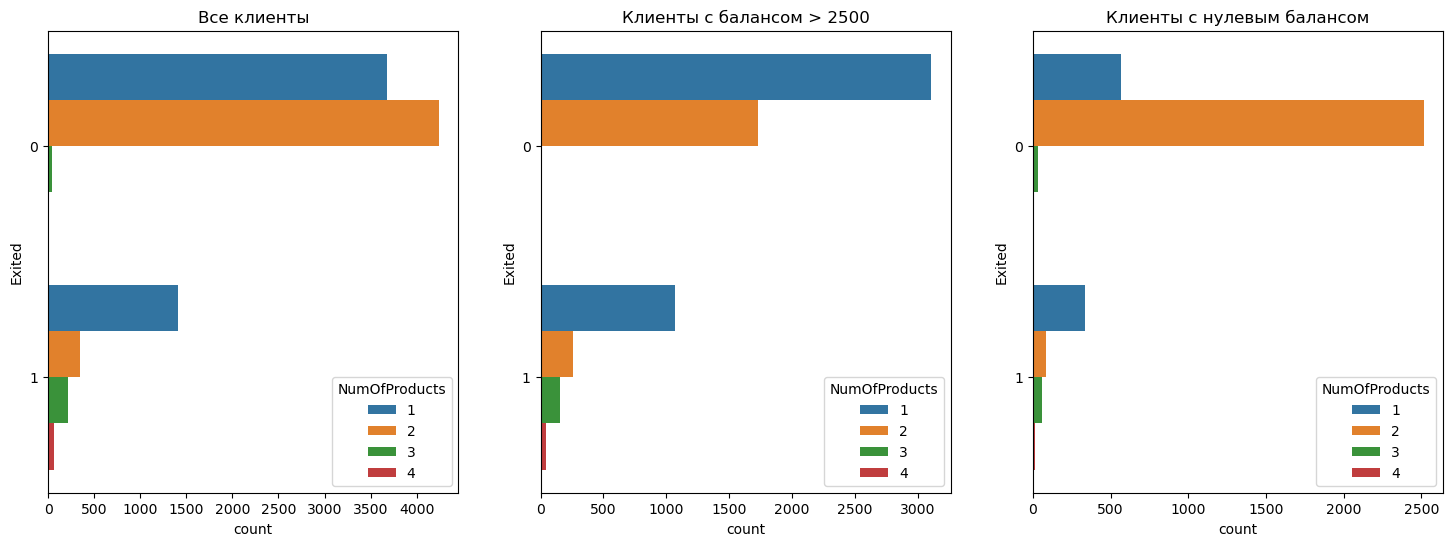

In [45]:
#dependent_variable_name = "Exited"
def show_dependend_exited(df1,df2,df3,dep_var):
    import seaborn as sns

    fig, axarr = plt.subplots(1, 3, figsize=(18, 6))
    sns.countplot(y = 'Exited', hue = dep_var, data = df1, ax = axarr[0])
    sns.countplot(y = 'Exited', hue = dep_var, data = df2, ax = axarr[1])
    sns.countplot(y = 'Exited', hue = dep_var, data = df3, ax = axarr[2])
    axarr[0].set_title("Все клиенты")
    axarr[1].set_title("Клиенты с балансом > 2500")
    axarr[2].set_title("Клиенты с нулевым балансом")
    #sns.countplot(x = 'IsActiveMember', hue = 'Gender',data = df, ax = axarr[1][0])
    #sns.countplot(x = 'NumOfProducts', hue = 'Gender',data = df, ax = axarr[1][1])
    #sns.countplot(x = 'Tenure', hue = 'Gender',data = df, ax = axarr[1][2])
       
    #zero, one = df[dependent_variable_name].value_counts() 
    #print("Dependent variable distribution;")
    #print(dependent_variable_name + " 0 count:", zero)
    #print(dependent_variable_name + " 1 count:", one)
numb_prods = "NumOfProducts"
show_dependend_exited(my_churn_data, client_2500, null_balance, numb_prods)


Комментарий 9.7:
 - У большинства ушедших клиентов только одна услуга. Большинство лояльных клиентов имеют 2 услуги.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

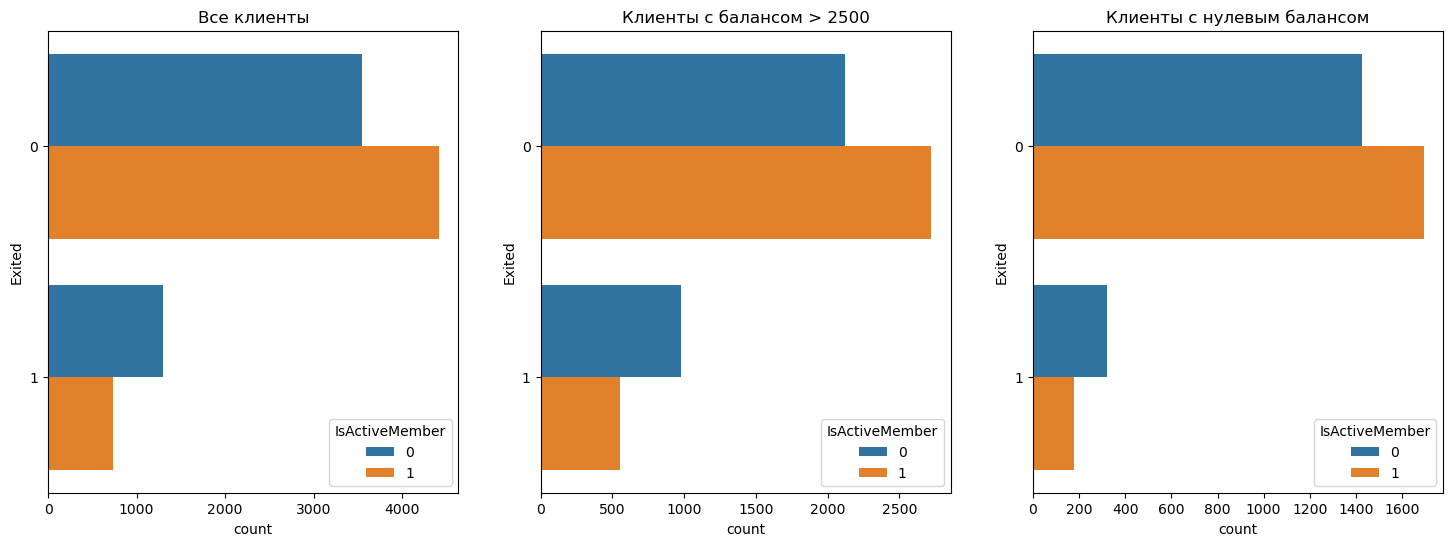

In [27]:
actv_memb_var = "IsActiveMember"
show_dependend_exited(my_churn_data, client_2500, null_balance, actv_memb_var )

Комментарий 9.8
У большинства ушедших клиентов нет активного статуса. Большинство лояльных клиентов имеют активный статус

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [128]:
import plotly.graph_objects as go

countries = ['Germany', 'France', 'Spain']
#procents = [32.4, 16.2, 16.7]
z = my_churn_data[my_churn_data['Exited'] == 1]['Geography'].value_counts()#считаем клиентов ушедших
y = my_churn_data[my_churn_data['Exited'] >= 0]['Geography'].value_counts()#cчитаем всех клиентов
procent_fr = (z.France/y.France * 100).round(1)#считаем долю ушедших по стране во Франции
procent_ge = (z.Germany/y.Germany * 100).round(1)#считаем долю ушедших по стране во Германии
procent_sp = (z.Spain/y.Spain * 100).round(1)#считаем долю ушедших по стране в Испании
procents = [procent_ge, procent_fr, procent_sp]

import pandas as pd


fig = go.Figure(data=go.Choropleth(
    locations=countries, 
    z= procents ,
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Exited Clients,%",
    
))

fig.update_layout(
    title_text = 'Доля ушедших клиентов по странам, в процентах',
    geo_scope='europe', # limite map scope 
)

fig.show()


Комментарий 9.9:
В Германии доля ушедших клиентов больше. Предположительно в большинстве случаев это было связано с тем (см.Комментарий 9.3), что у клиентов не было активного статуса и был только один банковский продукт.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

count                                        
Tenure            0   1   2   3   4   5   6   7   8   9   10
CreditScoreCat                                              
Excellent         11  20  14  17  12  21  21  12  20  26  13
Fair              20  47  49  50  43  48  52  45  51  42  23
Good              32  79  74  76  72  83  64  71  55  73  36
Poor              24  69  54  52  59  47  43  36  53  58  20
Very_Poor          8  17  10  18  17  10  16  13  18  14   9

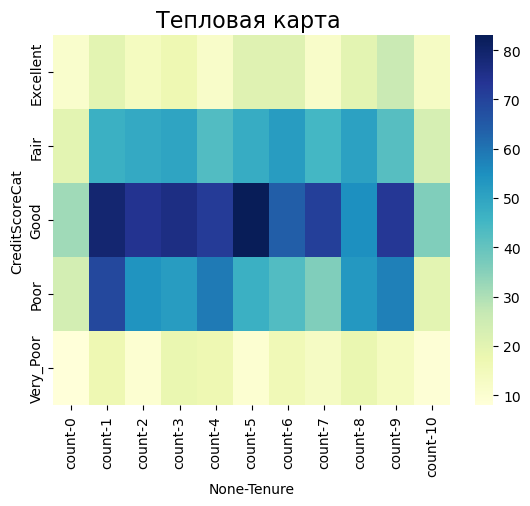

In [202]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


cs = my_churn_data['CreditScore']  
my_churn_data['CreditScoreCat'] = cs.apply(get_credit_score_cat)#применяем функцию 
my_churn_data['CreditScoreCat'] = my_churn_data['CreditScoreCat'].astype('category')

exited = my_churn_data[my_churn_data['Exited'] == 1] #только ушедшие

pivot = exited.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc=['count'],
    fill_value=0
).round()

#display(exited)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ', fontsize=16);
display(pivot)

Комментарии 9.10:
Чаще всего уходя клиенты из кредитной категории "Good" на 5 год в банке.